In [4]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

In [5]:
z, w, t = symbols('z w t')
theta, phi = symbols('theta phi', real = True)
init_printing(use_unicode=True)
D = Matrix([[0, I*(1 + conjugate(z*w))/2, conjugate(w) - 1,conjugate(z) - 1],
            [-I*(1 + z*w)/2, 0, 1 - z,  w - 1],
            [w -1, 1 - conjugate(z), 0, I*(conjugate(z) +w)/2],
            [z-1, conjugate(w)-1, -I*(z+conjugate(w))/2, 0]])
D

⎡                 ⎛_ _    ⎞                        ⎤
⎢               ⅈ⋅⎝w⋅z + 1⎠     _           _      ⎥
⎢      0        ───────────     w - 1       z - 1  ⎥
⎢                    2                             ⎥
⎢                                                  ⎥
⎢-ⅈ⋅(w⋅z + 1)                                      ⎥
⎢─────────────       0          1 - z       w - 1  ⎥
⎢      2                                           ⎥
⎢                                                  ⎥
⎢                                           ⎛    _⎞⎥
⎢                      _                  ⅈ⋅⎝w + z⎠⎥
⎢    w - 1         1 - z          0       ─────────⎥
⎢                                             2    ⎥
⎢                                                  ⎥
⎢                               ⎛    _⎞            ⎥
⎢                  _         -ⅈ⋅⎝z + w⎠            ⎥
⎢    z - 1         w - 1     ───────────      0    ⎥
⎣                                 2                ⎦

In [6]:
p = Poly((D - t *eye(4)).det(), t)
coeff = simplify(Matrix(p.all_coeffs()))
factor(simplify(coeff[2]))

In [7]:
collect(coeff[4], z)

In [8]:
discr = coeff[2]**2 - 4*coeff[4]
factor(discr)

In [9]:
simplify(discr.subs(z, exp(I*theta)).subs(w, exp(I*phi)))

In [10]:
def spec(alpha, beta): # Spectrum of function on z = exp(i alpha), w = exp(i beta) domain
    return (4*np.cos(alpha) + 4*np.cos(beta)- np.cos(alpha)*np.cos(beta) - 9)/2

vspec = np.vectorize(spec) # Vectorize spec

m, p = 30, 20 #Grid size

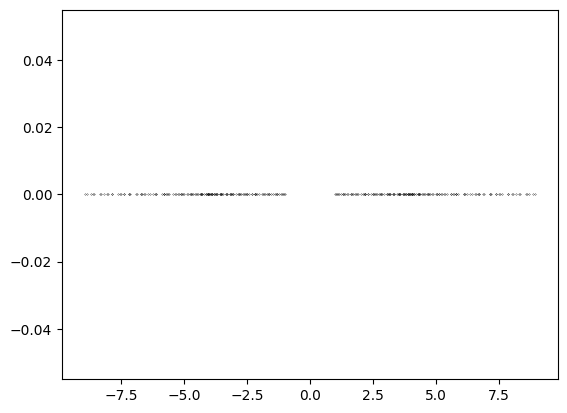

In [11]:
#Spectrum plot of D
for alpha in np.linspace(0, 2*np.pi, m):
    for beta in np.linspace(0, 2*np.pi, p):
        r = spec(alpha, beta)
        plt.plot(r, 0, 'k.', alpha=0.5, markersize=0.25)
        plt.plot(-r, 0, 'k.', alpha=0.5, markersize=0.25)

plt.show()

C:\Users\PATRICK DONAGHUE\AppData\Local\Temp\ipykernel_12060\808135514.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


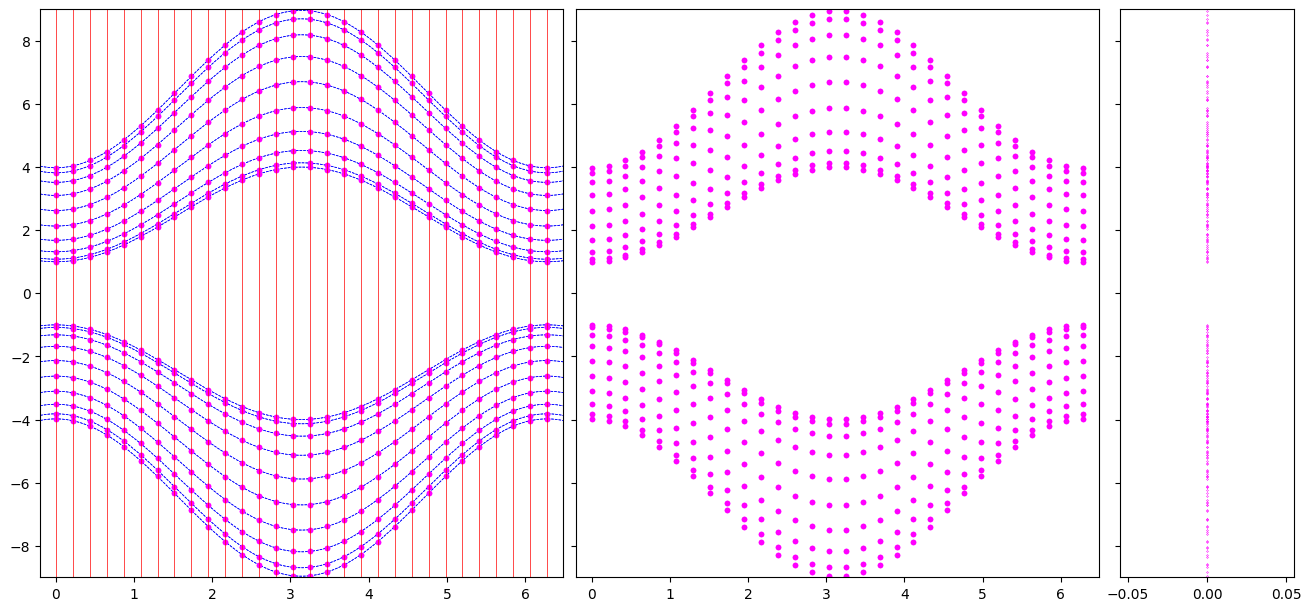

In [12]:
fig = plt.figure(layout="constrained", figsize=[13, 6])
ax = fig.subplot_mosaic('AAABBBC', sharey=True)


ax['A'].set(xlim=(-0.2, 2*np.pi+0.2), ylim=(-9, 9))
ax['B'].set(xlim=(-0.2, 2*np.pi+0.2), ylim=(-9, 9))
tl = np.linspace(-0.2, 2*np.pi+2, 150)
for bet in np.linspace(0, 2*np.pi, p):
    yl = vspec(tl, bet)
    ax['A'].plot(tl, yl, 'b--', linewidth=0.5)
    ax['A'].plot(tl, -yl, 'b--', linewidth=0.5)
    for al in np.linspace(0, 2*np.pi, m):
        s=spec(al, bet)
        ax['A'].plot(al, s, '.', color=[1,0,1])
        ax['A'].plot(al, -s, '.', color=[1,0,1])
        ax['B'].plot(al, s, '.', color=[1,0,1])
        ax['B'].plot(al, -s, '.', color=[1,0,1])
        ax['C'].plot(0, s, '.', color=[1,0,1], markersize=0.25)
        ax['C'].plot(0, -s, '.', color=[1,0,1], markersize=0.25)

for al in np.linspace(0, 2*np.pi, m):
    ax['A'].plot([al, al], [-9, 9], 'r', linewidth=0.5)
fig.show()

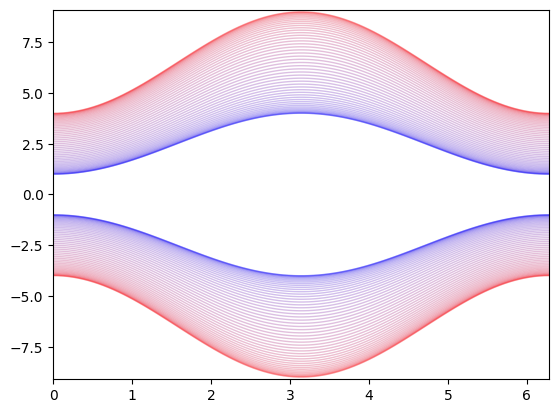

In [13]:
N = 50 #Number of psi to give 'level curve' feel
t = np.linspace(0, 2*np.pi, 100)
for k in range(0, N):
    s = (k*np.pi/N)*np.ones_like(t)
    y = vspec(t, s)
    plt.plot(t, y, linewidth=1, color = (k/N, 0, 1 - k/N, 0.25))
    plt.plot(t, -y, linewidth=1, color = (k/N, 0, 1 - k/N, 0.25))

ax = plt.gca()
ax.set(xlim=(0, 2*np.pi), ylim=(-9.1, 9.1))
plt.show()